## Grouping the error log

In [28]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Firstly, remove "Warning" data points in excel.

# loading the alarm data
def groupErrors(filepath):
    df = pd.read_excel(filepath)
    descSeries = df.groupby('Description').size().sort_values(ascending=False)

    # Printing the counted alarms
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(descSeries)
    
    # Prepare to save to file
    descDf = df.groupby(["Description"]).size().sort_values(ascending=False).reset_index(name='count')
    grpd = df.groupby(['Description']).size().to_frame('size')

    # Saving to file
    # grpd.to_csv(r'./dataset/faults3.csv')
    
    return descSeries
    
def groupErrorsDuration(filepath):
    df = pd.read_excel(filepath)

    # descSeries = df.groupby(['Description','Duration'])
    # .sort_values(ascending=False)

    # Printing the counted alarms
    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        # print(descSeries)
    
    # Prepare to save to file
    # descDf = df.groupby(["Duration"]).size().sort_values(ascending=False).reset_index(name='count')
    # grpd = df.groupby(['Duration']).size().to_frame('size')

    # Saving to file
    # grpd.to_csv(r'./dataset/faults3.csv')
    return df



In [55]:
# df['Duration'] = pd.Timedelta(df['Duration'])

def hhmmssToMinutes(value):
    h,m,s = value.split(":")
    if(h[0] == 0):
        if(h[1]==0):
            h=float(0)
        else:
            h = h[1]
            h = float(h)
    if(m[0] == 0):
        if(m[1])==0:
            m = float(0)
        else:
            m = float(m[1])
    if(s[0] == 0):
        if(s[1] == 0):
            s=float(0)
        else:
            s = float(s[1])
    s=float(s)
    m=float(m)
    h=float(h)
    minutes = 2
    minutes = h*float(60) + m + s/float(60)
    return minutes

# Parcing test
date = "02:05:11"
splittet = date.split(":")
m = hhmmssToMinutes(date)
m

125.18333333333334

### Load Data:

In [107]:
# Grouping errors by frequency
#skomaker_alrams_count = groupErrors('./DataFromBazefield/AlarmlogSkomakerfjellet2016-2019_uten_warnings.xlsx')
bessaker_alarm_count  = groupErrors('./DataFromBazefield/AlarmlogBessaker.xlsx')
ytre_vika_alarm_count = groupErrors('./DataFromBazefield/AlarmlogYtreVikna.xlsx')
valsneset_alarm_count = groupErrors('./DataFromBazefield/Alarmlog Valsneset.xlsx')

Description
N   2:1 Lack of wind - (Wind speed too low)                                        10700
N  8:0 Maintenance - (Maintenance)                                                  1772
N   21:2 Cable twisted - (Right (2-3 turns))                                         710
N   9:8 Generator heating - (Manual)                                                 459
R  60:15 Mains failure - (Overvoltage L2)                                            440
R  240:0 STATUS: Remote control PC (switched on)                                     430
R  62:7 Feeding fault - (Diff. P-set/P-actual)                                       424
N   1:1 Turbine Stopped - (Control cabinet)                                          363
N   17:0 Test safety system - (Test safety system)                                   338
R  240:246 STATUS: Remote control PC (Timeout receivebuffer)                         333
N   3:12 Storm - (Average windspeed - (10min))                                       317
R  240:1 

Description
N   2:1 Lack of wind - (Wind speed too low)                           1762
N  8:0 Maintenance - (Maintenance)                                     235
N   21:2 Cable twisted - (Right (2-3 turns))                           154
R  240:0 STATUS: Remote control PC (switched on)                       102
N   17:0 Test safety system - (Test safety system)                      90
N   2:2 Lack of wind - (Rotor speed too low)                            69
R  240:1 STATUS: Remote control PC (switched off)                       68
N   1:7 Turbine Stopped - (Scada system Control Center)                 53
R  240:246 STATUS: Remote control PC (Timeout receivebuffer)            37
R  61:0 Mains breakdown - (Mains breakdown)                             32
N   9:1 Generator heating - (Isometer)                                  31
N   1:1 Turbine Stopped - (Control cabinet)                             23
R  70:6 Generator overtemperature - (Rotor (measurement blade B))       18
R  222:1 Turb

In [108]:
bessaker_alarm_count

Description
N   2:1 Lack of wind - (Wind speed too low)                             10700
N  8:0 Maintenance - (Maintenance)                                       1772
N   21:2 Cable twisted - (Right (2-3 turns))                              710
N   9:8 Generator heating - (Manual)                                      459
R  60:15 Mains failure - (Overvoltage L2)                                 440
R  240:0 STATUS: Remote control PC (switched on)                          430
R  62:7 Feeding fault - (Diff. P-set/P-actual)                            424
N   1:1 Turbine Stopped - (Control cabinet)                               363
N   17:0 Test safety system - (Test safety system)                        338
R  240:246 STATUS: Remote control PC (Timeout receivebuffer)              333
N   3:12 Storm - (Average windspeed - (10min))                            317
R  240:1 STATUS: Remote control PC (switched off)                         306
R  222:1 Turbine reset - (Power failure)            

In [32]:
# Grouping Bessaker errors by duration

# d=groupErrorsDuration('./DataFromBazefield/AlarmlogBessaker.xlsx')
import datetime

f = './DataFromBazefield/AlarmlogBessaker.xlsx'
df = pd.read_excel(f)

df['Duration'] = df['Duration'].apply(lambda x: hhmmssToMinutes((x.strftime("%H:%M:%S"))))
df = df.sort_values("Duration",ascending=False)
df

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # print(df)


,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
1132,Bessaker,BESS-WTG12,Status_9_Substatus_3,0.377083,A,N 9:3 Generator heating - (Hygrostat inverter),2019-09-03 13:31:36.000,2019-09-04 13:28:22.000,1436.766667,Alarm,NaN
3994,Bessaker,BESS-WTG05,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2019-06-11 07:48:14.000,2019-06-13 07:43:22.000,1435.133333,Alarm,NaN
16744,Bessaker,BESS-WTG21,Status_9_Substatus_3,0.377083,A,N 9:3 Generator heating - (Hygrostat inverter),2018-02-27 09:20:09.000,2018-03-01 09:13:40.000,1433.516667,Alarm,NaN
3579,Bessaker,BESS-WTG10,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2019-06-21 09:37:15.000,2019-06-22 09:27:30.000,1430.250000,Alarm,NaN
3936,Bessaker,BESS-WTG06,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2019-06-14 08:53:09.000,2019-06-16 08:41:24.000,1428.250000,Alarm,NaN
16774,Bessaker,BESS-WTG03,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2018-02-25 11:21:05.000,2018-02-26 11:07:34.000,1426.483333,Alarm,NaN
20831,Bessaker,BESS-WTG22,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2017-08-25 11:30:18.000,2017-08-31 11:16:05.000,1425.783333,Alarm,NaN
21002,Bessaker,BESS-WTG17,Status_12_Substatus_1,0.500694,A,* 12:1 Rotor lock - (Activated (switch)),2017-08-14 14:21:45.000,2017-08-15 14:03:12.000,1421.450000,Alarm,NaN
5855,Bessaker,BESS-WTG07,Status_11_Substatus_0,0.458333,A,*11:0 Rotor brake activated manual - (Rotor br...,2019-04-10 10:25:55.000,2019-04-11 10:00:54.000,1414.983333,Alarm,NaN
20364,Bessaker,BESS-WTG10,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2017-09-15 17:24:19.000,2017-09-18 16:51:04.000,1406.750000,Alarm,NaN


In [104]:
plotThis = df.loc[:, 'Description':'Duration']
plotThis = plotThis.drop(['Start','End'],axis=1)

In [105]:
plotThis

,Description,Duration
0,R 62:7 Feeding fault - (Diff. P-set/P-actual),00:04:29
1,R 62:7 Feeding fault - (Diff. P-set/P-actual),00:04:24
2,R 222:3 Turbine reset - (Scada system),00:03:34
3,R 228:90 Timeout warnmessage - (Prot. circuit...,00:32:44
4,N 8:0 Maintenance - (Maintenance),05:59:47
5,N 2:1 Lack of wind - (Wind speed too low),00:23:11
6,N 2:1 Lack of wind - (Wind speed too low),00:24:41
7,N 2:1 Lack of wind - (Wind speed too low),00:20:41
8,N 2:1 Lack of wind - (Wind speed too low),00:32:17
9,N 2:1 Lack of wind - (Wind speed too low),01:01:55


In [34]:

plotThis= plotThis.drop(plotThis.columns[0], axis=1)
plotThis

,Duration
1132,1436.766667
3994,1435.133333
16744,1433.516667
3579,1430.250000
3936,1428.250000
16774,1426.483333
20831,1425.783333
21002,1421.450000
5855,1414.983333
20364,1406.750000


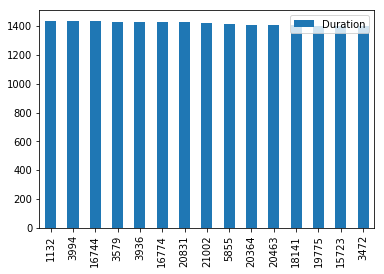

In [35]:
plotThis = plotThis.head(15)
plotThis.plot.bar()

In [103]:
# Seeing which turbine has the most faults:

df = pd.read_excel('./DataFromBazefield/AlarmlogBessaker.xlsx')
grpd = df.groupby(['Description','Turbine']).size().sort_values(ascending=False).to_frame('size')

grpd

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(grpd)

size
Description                                        Turbine         
N   2:1 Lack of wind - (Wind speed too low)        BESS-WTG25   514
                                                   BESS-WTG17   501
                                                   BESS-WTG10   487
                                                   BESS-WTG12   487
                                                   BESS-WTG23   486
                                                   BESS-WTG20   481
                                                   BESS-WTG19   473
                                                   BESS-WTG05   470
                                                   BESS-WTG24   468
                                                   BESS-WTG18   466
                                                   BESS-WTG11   464
                                                   BESS-WTG07   460
                                                   BESS-WTG06   458
                                                   BESS-WTG14   416
                                                   BESS-WTG22   413
                                                   BESS-WTG09   406
                                                   BESS-WTG16   401
                                                   BESS-WTG21   395
                                                   BESS-WTG08   392
                                                   BESS-WTG01   382
                                                   BESS-WTG02   382
                                                   BESS-WTG15   379
                                                   BESS-WTG13   342
                                                   BESS-WTG04   316
                                                   BESS-WTG03   261
R  62:7 Feeding fault - (Diff. P-set/P-actual)     BESS-WTG21   244
N  8:0 Maintenance - (Maintenance)                 BESS-WTG08   121
R  62:7 Feeding fault - (Diff. P-set/P-actual)     BESS-WTG13   114
N  8:0 Maintenance - (Maintenance)                 BESS-WTG03   111
R  67:508 Overtemperature - (Thermo switch heat... BESS-WTG23   111
...                                                             ...
R  300:81 Turbine control bus error - (I/O-boar... BESS-WTG01     1
R  300:61 Turbine control bus error - (Anemomet... BESS-WTG24     1
                                                   BESS-WTG13     1
                                                   BESS-WTG04     1
R  300:52 Turbine control bus error - (Yaw Inve... BESS-WTG24     1
                                                   BESS-WTG13     1
R  304:30 Data bus error (Timeout) - (Farm-Cont... BESS-WTG21     1
R  304:51 Data bus error (Timeout) - (Yaw inver... BESS-WTG15     1
R  42:106 Pitch control error - (Angle monitori... BESS-WTG19     1
R  304:52 Data bus error (Timeout) - (Yaw inver... BESS-WTG10     1
R  42:106 Pitch control error - (Angle monitori... BESS-WTG12     1
                                                   BESS-WTG04     1
R  42:105 Pitch control error - (Angle monitori... BESS-WTG16     1
                                                   BESS-WTG12     1
R  42:1 Pitch control error - (Speed after stop... BESS-WTG13     1
R  429:209 Error supply hardware - (Inverter Co... BESS-WTG05     1
R  40:1 Rotor overspeed - (Measurement pitch co... BESS-WTG11     1
R  320:83 Malfunction IIC-bus - (I/O-board 1 na... BESS-WTG20     1
R  304:98 Data bus error (Timeout) - (Rectifier 2) BESS-WTG17     1
                                                   BESS-WTG16     1
                                                   BESS-WTG13     1
R  304:97 Data bus error (Timeout) - (Rectifier 1) BESS-WTG17     1
                                                   BESS-WTG12     1
R  304:84 Data bus error (Timeout) - (I/O-board... BESS-WTG13     1
R  304:83 Data bus error (Timeout) - (I/O-board... BESS-WTG23     1
                                                   BESS-WTG13     1
                                                   

### Plot the Most Frequent Alarms from Bessaker

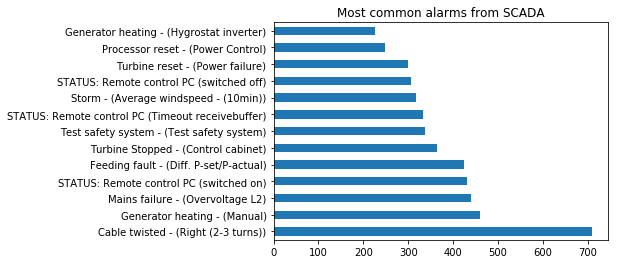

In [109]:
mostFrequentAlarms = bessaker_alarm_count.head(15)

# Remove status codes from description
parsed_alarms = [' '.join(x.split()[2:]) for x in mostFrequentAlarms.keys()]
mostFrequentAlarms = pd.Series(mostFrequentAlarms.values, index=parsed_alarms)

# Removing the 'Low Wind Speed' and 'Maintenence' Alarms
mostFrequentAlarms = mostFrequentAlarms.iloc[2:]

# Make bar plot
plt.title('Most common alarms from SCADA')
mostFrequentAlarms.plot.barh()

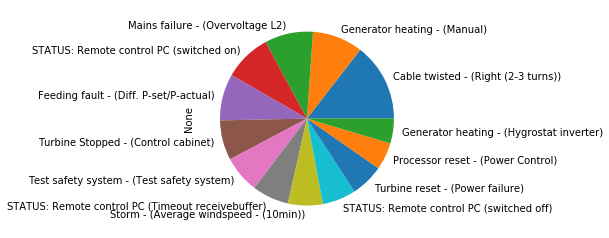

In [101]:
mostFrequentAlarms.plot.pie(figsize=(4,4))